The following libraries are required.

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance as dist

This sets up a simulation of 5 five random points in space before and after some disturbance.

In [77]:
np.random.seed(20180814)

# Random initial points.
n_pnts = 5 
range_pnts = 20
coords_1 = np.random.uniform(-range_pnts, range_pnts, size = n_pnts * 2)
coords_1 = coords_init.reshape(n_pnts, -1)

# Randomly perturb points
translate = np.random.normal(loc = 1, scale = 2, size = n_pnts * 2)
translate = translate.reshape(n_pnts, -1)
coords_2 = coords_1 + translate

# Shuffle the pertubed points
np.random.shuffle(coords_1)

print("First set of co-ordinates:")
print(coords_init)

print()

print("Second set of co-ordinates:")
print(coords_next)

First set of co-ordinates:
[[-12.19934712 -13.58706107]
 [  0.12602839   5.7940266 ]
 [ -5.83923312  10.88983708]
 [ 14.34670373   1.04889734]
 [-10.45462379  -7.53377871]]

Second set of co-ordinates:
[[ -9.63570932  -6.64937052]
 [  0.90177465   8.28003383]
 [ 11.82227151   2.63881276]
 [ -6.32537629  15.30844322]
 [-12.22304356 -10.87817884]]


Note that in the above, the second set of co-ordinates were shuffled since the objective will be to write some code to figure out pairs of close points.  It would be trivial if the points were in same order in both co-ordinate sets!  Here is a plot of the points:

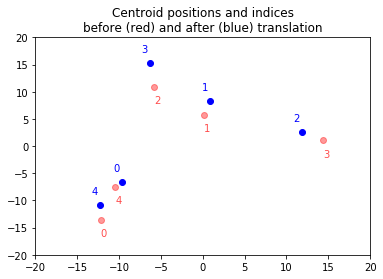

In [111]:
# Plot the points.
x_1, y_1 = coords_init.T
x_2, y_2 = coords_next.T

_ = plt.scatter(x_1, y_1, color = 'red', alpha = 0.4)
_ = plt.scatter(x_2, y_2, color = 'blue')
_ = plt.xlim((-range_pnts, range_pnts))
_ = plt.ylim((-range_pnts, range_pnts))
_ = plt.title("Centroid positions and indices\n"
              "before (red) and after (blue) translation")

for i, (x, y) in enumerate(zip(x_1, y_1)):
    plt.annotate(i, xy=(x, y - 3), xycoords='data', color = 'red',
                 alpha = 0.7)
    
for i, (x, y) in enumerate(zip(x_2, y_2)):
    plt.annotate(i, xy=(x - 1, y + 2), xycoords='data', color = 'blue')


It is clear from observation that the pairs of corresponding points are:

| Before | After |
| ------ | ----- |
| 0      | 4     |
| 1      | 1     |
| 2      | 3     |
| 3      | 2     |
| 4      | 0     |


The objective now is to deduce this with code.  The euclidean distance between first and second sets of points are found with:

In [112]:
# Euclidean distances.
euclidean_dist = dist.cdist(coords_init, coords_next)
euclidean_dist

array([[ 7.39620098, 25.49135601, 28.98822421, 29.48650033,  2.70898587],
       [15.81548782,  2.60423006, 12.11435006, 11.49542283, 20.74757847],
       [17.94539035,  7.22857239, 19.49379769,  4.44526888, 22.68478682],
       [25.18768477, 15.26615384,  2.98338551, 25.11313484, 29.12398698],
       [ 1.20532102, 19.46906399, 24.48962395, 23.21244898,  3.78316279]])

The closest *second* point to each *first point* is given by the index of the minimum in each row.  The rows are then arranged in order of the minima, from smallest to largest:

In [120]:
# Find point index which is closest to each point.
rows = euclidean_dist.min(axis=1)
print("Distance to closest second point from each first point.")
print(rows)

print()

rows = rows.argsort()
print("Indices of first points in order of distance to closest "
      "to second points:")
print(rows)

Distance to nearest second point from each first point.
[2.70898587 2.60423006 4.44526888 2.98338551 1.20532102]

Indices of first points in order of distance to closest to second points:
[4 1 0 3 2]


The `row` array now lists the indices of the *first* set of co-ordinates in order of how close they are to the possible counterpart *second* point.  This can be observed in the figure.

Next, we find index of the minimum value in each column; this denotes the closest *first* point for each *second* point.  We now arrange then arrange these in order of the closeness of *first* points to *second* points i.e. in order of `row`.  In other words, we lookup the *second* point corresponding to the *first* point in order of the distance of the closest point pairs.

In [118]:
cols = euclidean_dist.argmin(axis=1)
print("Closest first point for each second point:")
print(cols)

print()

cols = cols[rows]
print("Closest first point for each second point:")
print(cols)

Closest first point for each second point.
[4 1 3 2 0]
[0 1 4 2 3]


Now, we have pairs of *first* points and *second* points in order of their distance from each other.

In [122]:
print(list(zip(rows, cols)))

[(4, 0), (1, 1), (0, 4), (3, 2), (2, 3)]
